## PSTAT 160A Summer 2025 Python Homework 1

**Release date:** Friday, June 27th <br>
**Due date:** Wednesday, July 2nd, 11:59 p.m. PT via Gradescope (as a notebook, not as a PDF)

**Instructions:** Please upload your IPYNB file on Gradescope with filename "PythonHW1_YOURPERMNUMBER".


As usual, we start with loading some packages:

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy.random as npr

## Problem 1 (4 points)

1. Implement the simulation of a biased 6-sided die which takes the values 1,2,3,4,5,6 with probabilities 0.25, 0.15, 0.05, 0.25, 0.20, 0.10.

We first start with defining a function that simulates the dice roll.

In [26]:
npr.seed(160)

def biased_die_roll():
    # ADD YOUR CODE HERE
    outcomes = [1, 2, 3, 4, 5, 6] # The possible values of the dice roll
    probabilities = [0.25, 0.15, 0.05, 0.25, 0.2, 0.1] # The corresponding probabilities of each value
    result = np.random.choice(outcomes, p = probabilities)
    return result

# Checking work
result = biased_die_roll()
print("Result of biased die roll:", result)

Result of biased die roll: 5


2. Plot a histogram with results of **100** simulations. Check if the relative counts of each die outcome are approximately equal to the corresponding specified probabilities.

_Remark:_ Note how the bins of the histogram are specified.

**Some of the die outcomes are relatively equal, but some of the others vary by about 5 percent from the original probability assigned to them.**

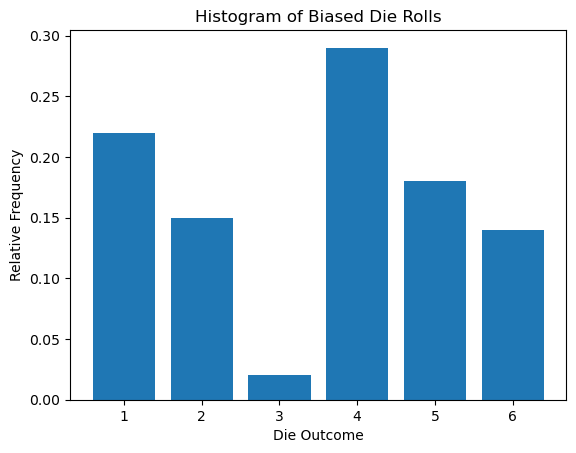

In [27]:
# Simulate 100 rolls of the biased die
results_100 = [biased_die_roll() for _ in range(100)]

# Plot the histogram [ YOUR PICTURE WILL LOOK DIFFERENT]
plt.hist(results_100, bins=range(1, 8), align='left', rwidth=0.8, density=True)

plt.xlabel('Die Outcome')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Biased Die Rolls')

plt.show()


3. Repeat the above with 100,000 simulations. Create a new histogram and compare again the relative counts of each die outcomes to the specified probabilities. *Modify the code below* to show the two histogram on the same figure so they are easier to compare. What do you find (**summarize in 3-4 sentences**) as we use more simulations?



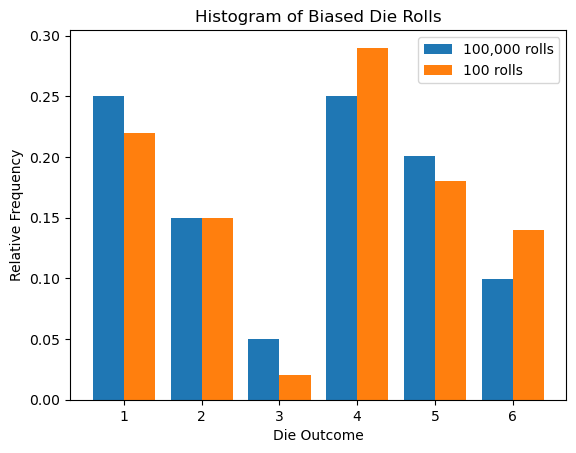

In [28]:
# Simulate 100,000 rolls of the biased die
results_100000 = [biased_die_roll() for _ in range(100000)]

# Plot the histogram
plt.hist([results_100000, results_100], bins=range(1, 8), align='left', rwidth=0.8, density=True, label=['100,000 rolls', '100 rolls'])

plt.xlabel('Die Outcome')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Biased Die Rolls')

### Modify code to show both histograms side-by-side
plt.legend()
plt.show()


------ ADD YOUR DISCUSSION HERE -----------

I find that the as we simulate more times, the relative frequencies tend to get closer to the true probability of each die outcome. The results with 100 rolls is much more likely to have deviations of 5% or more from the true probability, while the results with 100,000 rolls is pretty close to the true probabilities. This is due to the law of large numbers where as the amount of samples increases, the sample probabilities will approach the true probabilities.


## Problem 2 (6 Points)

Every day Mike goes to get coffee at Dune Coffee, and randomly orders one of cappuccino, latte, macchiato, espresso or flat white -- 5 choices that he picks uniformly at random. 

1. Implement a simulator which uniformly samples from one of the 5 drinks above:

In [29]:
np.random.seed(1000)
def coffee_simulator():
    drink_outcomes = ["cappuccino", "latte", "macchiato", "espresso", 'flat white'] # sample space of outcomes
    sample = np.random.choice(drink_outcomes) # since it's uniform, don't have to specify a probability distribution
    return sample

# Checking
result = coffee_simulator()
print("Randomly selected drink:", result)


Randomly selected drink: espresso


2. On the day that Mike first picks **cappuccino**, find the empiricial _mean_ and empirical _standard deviation_ of the number of prior days in which he picked a **espresso** by running 10,000 simulations. [This question is conceptually similar to the question about rolling 5's before the first '6' appears that was done in one of the videos -- now we re-solve it/verify the answer by simulation]



In this problem, we have to establish two random variables, X and Y. X will be the amount of days it takes to get a cappuccino, and it follows that X is a geometric distribution with p = 0.2. Y will be the amount of times an espresso is picked within X days, so Y will be a binomial distribution dependent on X as Y ~ Bin(X, 0.2). We then will use NumPy to calculate the empirical mean and standard deviation of Y.

In [30]:
### ADD YOUR CODE HERE

# Create a list to keep track of how many espressos occur in each simulation
Y_values_list = []

# Let Random Variable X be the amount of days it takes for Mike to get a cappuccino. X ~ Geom(1/5).
for _ in range(10000):
    espresso_count = 0 # This will be the random variable Y
    while True:
        draw = coffee_simulator()
        if draw == 'cappuccino': # This will serve as our random variable X
            break # counter stops when we get our first cappuccino
        if draw == 'espresso':
            espresso_count += 1
    Y_values_list.append(espresso_count) # All Y values from the simulations stored in list

# Convert to NumPy array to get mean and std dev
Y_values_list = np.array(Y_values_list)

# Get empirical mean and std dev
empirical_mean = np.mean(Y_values_list)
empirical_std = np.std(Y_values_list, ddof=1)

print("Empirical Mean:", empirical_mean)
print("Empirical Standard Deviation:", empirical_std)

Empirical Mean: 0.9917
Empirical Standard Deviation: 1.4117472907858915
